In [1]:
import requests
import pandas as pd
import numpy as np

## Data preparation

### Download the dataset

In [2]:
all_years = [2021]
all_months = ['09', '10', '11', '12']
url = 'https://d37ci6vzurychx.cloudfront.net/trip-data/'
file_name = 'yellow_tripdata_%d-%s.parquet'


In [3]:
for year in all_years:
    for month in all_months:
        yellow_csv = file_name % (year, month)
        response = requests.get( url + yellow_csv, allow_redirects=True)
        open( yellow_csv, 'wb').write(response.content)

### Read the dataset

In [ ]:
# Install package to read parquet files
!pip3 install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
all_yellow_trip_data = pd.DataFrame()

for year in all_years:
    for month in all_months:
        yellow_csv = pd.read_parquet( file_name % (year, month) )
        all_yellow_trip_data = all_yellow_trip_data.append(yellow_csv)

/tmp/ipykernel_94/174200654.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_yellow_trip_data = all_yellow_trip_data.append(yellow_csv)
/tmp/ipykernel_94/174200654.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_yellow_trip_data = all_yellow_trip_data.append(yellow_csv)
/tmp/ipykernel_94/174200654.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_yellow_trip_data = all_yellow_trip_data.append(yellow_csv)
/tmp/ipykernel_94/174200654.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_yellow_trip_data = all_yellow_trip_data.append(yellow_csv)


In [ ]:
len(all_yellow_trip_data)

13114615

In [ ]:
all_yellow_trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13114615 entries, 0 to 3214368
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee          

### Pre-process: Data properties

In [7]:
# Missing data
features_nan = [feature for feature in all_yellow_trip_data.columns if all_yellow_trip_data[feature].isnull().sum() > 1]
for feature in features_nan:
    print(f"{feature}: {np.round(all_yellow_trip_data[feature].isnull().mean(), 4)}% missing values")

passenger_count: 0.0388% missing values
RatecodeID: 0.0388% missing values
store_and_fwd_flag: 0.0388% missing values
congestion_surcharge: 0.0388% missing values
airport_fee: 0.0388% missing values


In [8]:
# Clean the empty data
all_data_nonan = all_yellow_trip_data.dropna()
all_data_nonan.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

In [9]:
# Look at the unique values for different columns
for column in all_data_nonan.columns:
    series = all_data_nonan[column]
    print('Feature : ', column , ' min : ', series.min(), ' max : ', series.max())

Feature :  VendorID  min :  1  max :  2
Feature :  tpep_pickup_datetime  min :  2003-01-01 00:26:16  max :  2098-09-11 02:23:31
Feature :  tpep_dropoff_datetime  min :  2003-01-01 00:38:46  max :  2098-09-11 02:52:04
Feature :  passenger_count  min :  0.0  max :  9.0
Feature :  trip_distance  min :  0.0  max :  18867.9
Feature :  RatecodeID  min :  1.0  max :  99.0
Feature :  store_and_fwd_flag  min :  N  max :  Y
Feature :  PULocationID  min :  1  max :  265
Feature :  DOLocationID  min :  1  max :  265
Feature :  payment_type  min :  1  max :  5
Feature :  fare_amount  min :  -758.0  max :  818283.44
Feature :  extra  min :  -5.5  max :  30.5
Feature :  mta_tax  min :  -0.55  max :  38.8
Feature :  tip_amount  min :  -190.2  max :  999.99
Feature :  tolls_amount  min :  -88.75  max :  911.3
Feature :  improvement_surcharge  min :  -0.3  max :  0.3
Feature :  total_amount  min :  -951.0  max :  818286.74
Feature :  congestion_surcharge  min :  -2.5  max :  2.75
Feature :  airport_fee 

### Data cleaning

In [10]:
cleaned_data = all_data_nonan[all_data_nonan["passenger_count"] > 0]
cleaned_data  = cleaned_data [cleaned_data["trip_distance"] != 0]
cleaned_data  = cleaned_data [(cleaned_data ['tpep_pickup_datetime']<='2021-12-31 23:59:59') & (cleaned_data ['tpep_pickup_datetime']>='2021-09-01 00:00:00')]
cleaned_data  = cleaned_data [(cleaned_data ['tpep_dropoff_datetime']<='2021-12-31 23:59:59') & (cleaned_data ['tpep_dropoff_datetime']>='2021-09-01 00:00:00')]

cleaned_data = cleaned_data[cleaned_data["payment_type"] == 1]
cleaned_data = cleaned_data[cleaned_data["fare_amount"] >= 2.5]

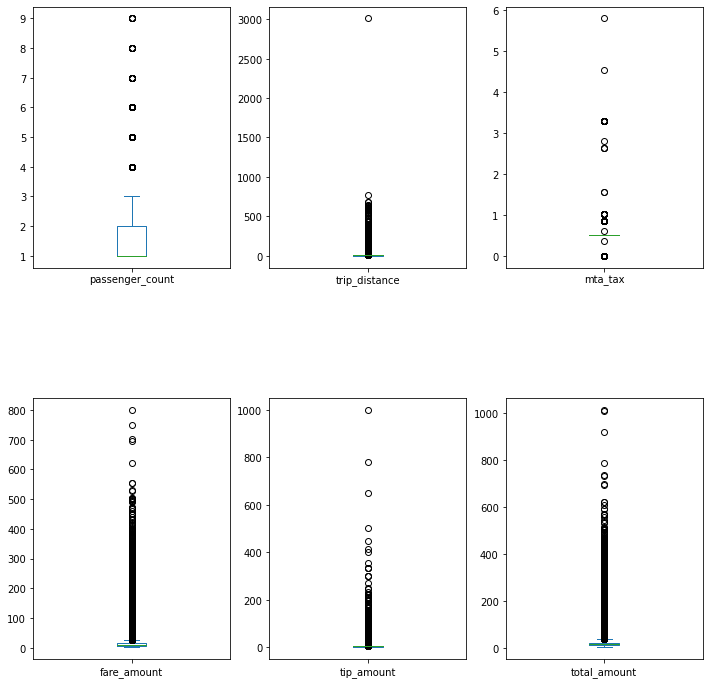

In [11]:
check_feature = ['passenger_count','trip_distance','mta_tax','fare_amount','tip_amount','total_amount']
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
plt.rcParams.update({'font.size': 14})
i = 0
for k in check_feature:
    cleaned_data.plot(y=k, kind='box', ax=axs.ravel()[i])
    i += 1
plt.show()

In [12]:
# Clean the outlier in amount feature
amount = ["fare_amount", "tip_amount", "total_amount"]
Q1 = cleaned_data[amount].quantile(0.25)
Q3 = cleaned_data[amount].quantile(0.75)
IQR = Q3 - Q1
cleaned = cleaned_data[~((cleaned_data[amount] < (Q1-3*IQR)) | (cleaned_data[amount] > (Q3+3*IQR))).any(axis=1)]


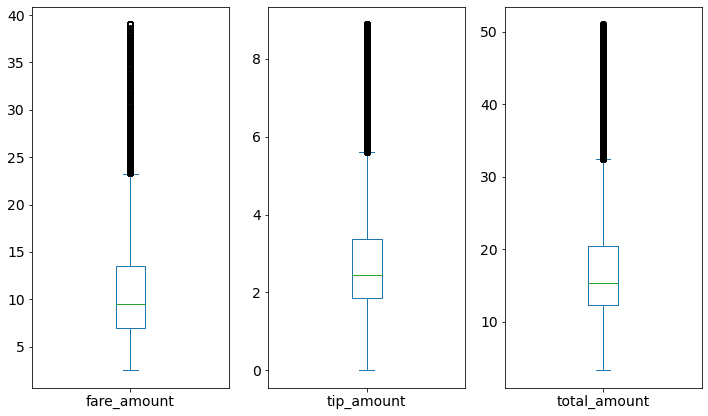

In [ ]:
# Plot result
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 7))
#fig.suptitle(fontsize=30, y=0.95)
plt.subplots_adjust(hspace=0.5)
i = 0
for k in amount:
    cleaned.plot(y=k, kind='box', ax=axs.ravel()[i])
    i += 1
plt.show()

### Add new attributes

In [13]:
# Process time information into new features

cleaned['month'] = pd.to_datetime(cleaned['tpep_pickup_datetime']).dt.month
cleaned['day'] = pd.to_datetime(cleaned['tpep_pickup_datetime']).dt.day
cleaned['week'] = pd.to_datetime(cleaned['tpep_pickup_datetime']).dt.week
cleaned['weekday'] = pd.to_datetime(cleaned['tpep_pickup_datetime']).dt.weekday
cleaned['starting_hour'] = pd.to_datetime(cleaned['tpep_pickup_datetime']).dt.hour
cleaned['ending_hour'] = pd.to_datetime(cleaned['tpep_dropoff_datetime']).dt.hour
cleaned['trip_time'] = (pd.to_datetime(cleaned['tpep_dropoff_datetime'])-pd.to_datetime(cleaned['tpep_pickup_datetime'])).dt.total_seconds()
cleaned['date'] = cleaned['tpep_pickup_datetime'].apply(str).str[:13]

/tmp/ipykernel_94/1015276556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['month'] = pd.to_datetime(cleaned['tpep_pickup_datetime']).dt.month
/tmp/ipykernel_94/1015276556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['day'] = pd.to_datetime(cleaned['tpep_pickup_datetime']).dt.day
/tmp/ipykernel_94/1015276556.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  cleaned['week'] = pd.to_datetime(cleane

In [ ]:
cleaned.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,airport_fee,month,day,week,weekday,starting_hour,ending_hour,trip_time,date
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,...,2.5,0.0,9,1,35,2,6,6,654.0,2021-09-01 06
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,1,...,2.5,0.0,9,1,35,2,6,6,368.0,2021-09-01 06
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,1,...,2.5,0.0,9,1,35,2,6,6,255.0,2021-09-01 06
5,1,2021-09-01 00:15:08,2021-09-01 00:21:39,1.0,1.60,1.0,N,239,263,1,...,2.5,0.0,9,1,35,2,0,0,391.0,2021-09-01 00
6,1,2021-09-01 00:35:36,2021-09-01 00:57:56,1.0,7.60,1.0,N,137,42,1,...,2.5,0.0,9,1,35,2,0,0,1340.0,2021-09-01 00
7,2,2021-09-01 00:34:09,2021-09-01 00:42:25,1.0,1.24,1.0,N,45,232,1,...,2.5,0.0,9,1,35,2,0,0,496.0,2021-09-01 00
10,2,2021-09-01 00:56:22,2021-09-01 01:21:37,1.0,6.14,1.0,N,181,149,1,...,0.0,0.0,9,1,35,2,0,1,1515.0,2021-09-01 00
11,2,2021-09-01 00:05:12,2021-09-01 00:11:44,1.0,0.92,1.0,N,234,107,1,...,2.5,0.0,9,1,35,2,0,0,392.0,2021-09-01 00
12,2,2021-09-01 00:15:13,2021-09-01 00:18:50,1.0,1.38,1.0,N,137,229,1,...,2.5,0.0,9,1,35,2,0,0,217.0,2021-09-01 00
13,2,2021-09-01 00:22:00,2021-09-01 00:28:02,1.0,1.36,1.0,N,233,140,1,...,2.5,0.0,9,1,35,2,0,0,362.0,2021-09-01 00


### Get additional data -- weather

In [14]:
# Load weather data
weather_data = pd.read_csv("weather2021.csv")
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929 entries, 0 to 2928
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2929 non-null   int64  
 1   name              2929 non-null   object 
 2   datetime          2929 non-null   object 
 3   temp              2929 non-null   float64
 4   feelslike         2929 non-null   float64
 5   dew               2929 non-null   float64
 6   humidity          2929 non-null   float64
 7   precip            2929 non-null   float64
 8   precipprob        2929 non-null   int64  
 9   preciptype        235 non-null    object 
 10  snow              2929 non-null   float64
 11  snowdepth         2929 non-null   float64
 12  windgust          788 non-null    float64
 13  windspeed         2929 non-null   float64
 14  winddir           2929 non-null   float64
 15  sealevelpressure  2929 non-null   float64
 16  cloudcover        2929 non-null   float64


In [15]:
# Pick features
weather_data_pick = weather_data[['datetime','temp','humidity','precip','snow','snowdepth','windspeed','visibility','conditions']]
weather_data_pick.head(10)

,datetime,temp,humidity,precip,snow,snowdepth,windspeed,visibility,conditions
0,2021-09-01 00,25.0,70.03,0.000,0.0,0.0,0.4,16.0,Partially cloudy
1,2021-09-01 01,25.1,67.89,0.000,0.0,0.0,0.3,16.0,Overcast
2,2021-09-01 02,25.0,70.21,0.000,0.0,0.0,0.0,16.0,Overcast
3,2021-09-01 03,25.0,73.02,0.000,0.0,0.0,0.0,16.0,Overcast
4,2021-09-01 04,25.0,73.31,0.000,0.0,0.0,10.5,16.0,Overcast
5,2021-09-01 05,23.4,83.98,0.000,0.0,0.0,0.2,16.0,Overcast
6,2021-09-01 06,23.3,75.89,0.000,0.0,0.0,9.2,16.0,Overcast
7,2021-09-01 07,22.2,81.47,0.028,0.0,0.0,7.3,15.8,"Rain, Partially cloudy"
8,2021-09-01 08,22.1,87.44,0.303,0.0,0.0,12.7,15.5,"Rain, Partially cloudy"
9,2021-09-01 09,22.1,84.44,0.276,0.0,0.0,12.6,15.5,"Rain, Partially cloudy"


In [16]:
# Merge to get new data
data = pd.merge(cleaned, weather_data_pick, left_on='date', right_on='datetime')
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,date,datetime,temp,humidity,precip,snow,snowdepth,windspeed,visibility,conditions
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,1,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,1,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast
3,1,2021-09-01 06:02:50,2021-09-01 06:09:01,1.0,0.90,1.0,N,100,161,1,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast
4,1,2021-09-01 06:23:23,2021-09-01 06:27:48,1.0,1.00,1.0,N,48,68,1,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787299,1,2021-12-31 23:03:02,2021-12-31 23:24:16,2.0,5.80,1.0,N,144,7,1,...,2021-12-31 23,2021-12-31 23,10.7,84.91,0.0,0.0,0.0,3.0,10.7,Overcast
8787300,2,2021-12-31 23:11:13,2021-12-31 23:13:49,2.0,0.61,1.0,N,113,234,1,...,2021-12-31 23,2021-12-31 23,10.7,84.91,0.0,0.0,0.0,3.0,10.7,Overcast
8787301,2,2021-12-31 23:27:31,2021-12-31 23:32:32,2.0,0.95,1.0,N,164,137,1,...,2021-12-31 23,2021-12-31 23,10.7,84.91,0.0,0.0,0.0,3.0,10.7,Overcast
8787302,2,2021-12-31 23:07:23,2021-12-31 23:12:45,2.0,1.05,1.0,N,237,229,1,...,2021-12-31 23,2021-12-31 23,10.7,84.91,0.0,0.0,0.0,3.0,10.7,Overcast


In [ ]:
data.to_csv("processed.csv")

In [1]:
from google.colab import drive#
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/processed.csv")

In [ ]:
data.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,date,datetime,temp,humidity,precip,snow,snowdepth,windspeed,visibility,conditions
0,0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast
1,1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast
2,2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast
3,3,1,2021-09-01 06:02:50,2021-09-01 06:09:01,1.0,0.90,1.0,N,100,161,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast
4,4,1,2021-09-01 06:23:23,2021-09-01 06:27:48,1.0,1.00,1.0,N,48,68,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast
5,5,1,2021-09-01 06:29:16,2021-09-01 06:32:55,1.0,0.90,1.0,N,186,48,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast
6,6,1,2021-09-01 06:36:20,2021-09-01 06:40:38,1.0,1.00,1.0,N,50,48,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast
7,7,1,2021-09-01 06:48:40,2021-09-01 06:52:07,1.0,0.90,1.0,N,143,238,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast
8,8,2,2021-09-01 06:46:09,2021-09-01 06:54:03,1.0,1.94,1.0,N,234,229,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast
9,9,2,2021-09-01 06:59:11,2021-09-01 07:06:25,1.0,1.23,1.0,N,237,161,...,2021-09-01 06,2021-09-01 06,23.3,75.89,0.0,0.0,0.0,9.2,16.0,Overcast


In [ ]:
from collections import Counter
len(Counter(data['PULocationID']))

250

## Data analysis

In [19]:
import seaborn as sns

### Heat map analysis

<AxesSubplot:>

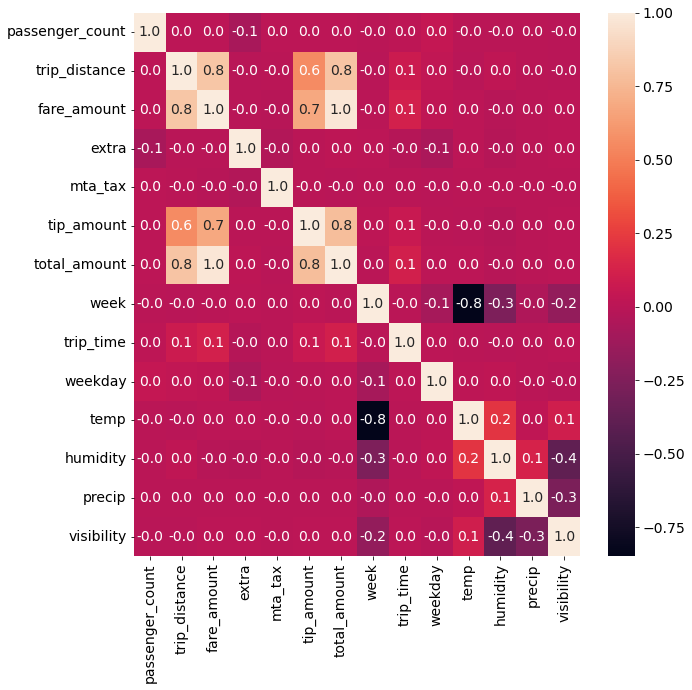

In [20]:
CORR_COLS = ["passenger_count", "trip_distance", "fare_amount", "extra",
             "mta_tax", "tip_amount", "total_amount", "week", "trip_time", "weekday", "temp","humidity","precip","visibility"]
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data[CORR_COLS].corr(), annot=True, fmt=".1f",ax=ax)

### Data distribution analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

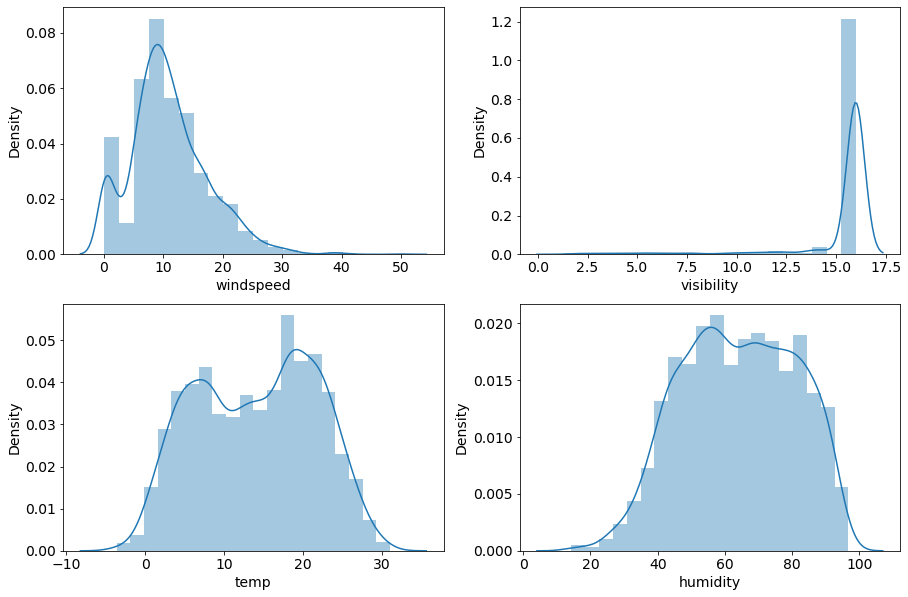

In [ ]:
weather_feature = ['windspeed','visibility','temp','humidity']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
axs = [ax1, ax2, ax3, ax4]
for feature, ax in zip(weather_feature, axs):
    sns.distplot(weather_data[feature], ax=ax, bins=20)
#plt.suptitle('Weather Feature Distribution',fontsize=30,y=0.95)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and wi

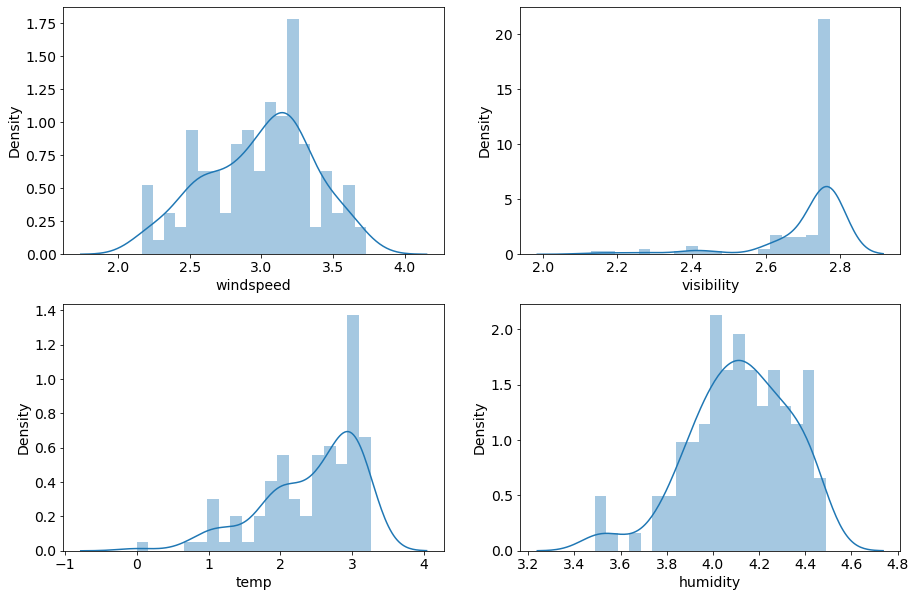

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
axs = [ax1, ax2, ax3, ax4]
for feature, ax in zip(weather_feature, axs):
    data_log = np.log(weather_data[feature])
    sns.distplot(data_log, ax=ax, bins=20)
#plt.suptitle('Weather Feature Log Distribution',fontsize=30,y=0.95)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


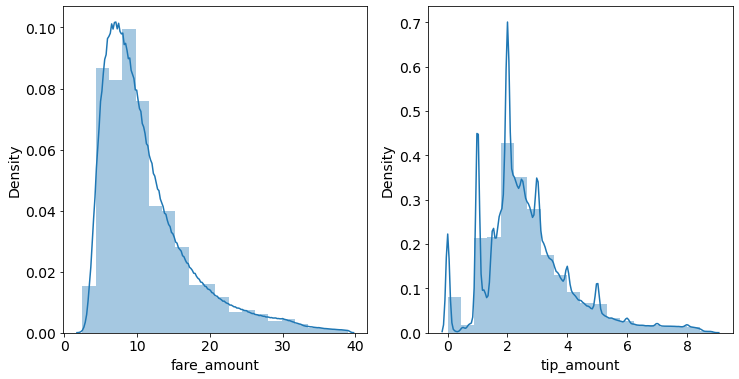

In [ ]:
taxi_feature = ['fare_amount','tip_amount']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
axs = [ax1, ax2, ax3, ax4]
for feature, ax in zip(taxi_feature, axs):
    sns.distplot(cleaned[feature], ax=ax, bins=20)
#plt.suptitle('Taxi Fare Distribution',fontsize=30,y=0.95)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


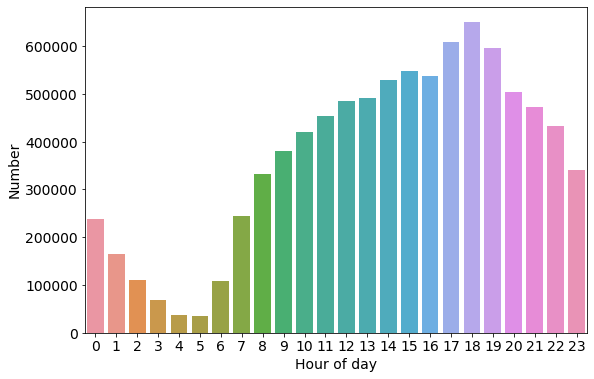

In [ ]:
# trip freq by hour
plt.figure(figsize=(9, 6))
count = data.groupby("starting_hour").count()["tpep_pickup_datetime"]
#plt.plot(count.index, count)
sns.barplot(count.index, count)
plt.ylabel("Number")
plt.xlabel("Hour of day")
#plt.title('Frequency of Trip in each Hour')
plt.savefig('Frequency of Trip in each Hour.png')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


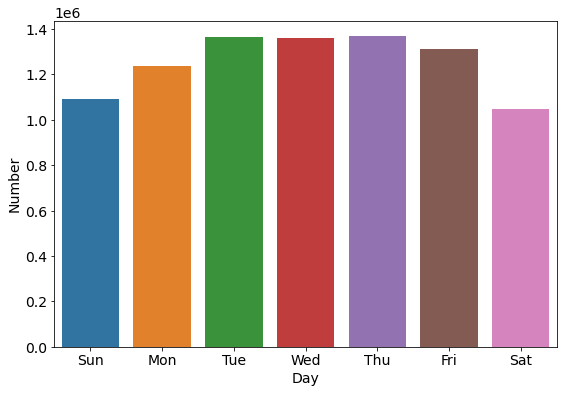

In [ ]:
# trip freq by week day
plt.figure(figsize=(9, 6))
count = data.groupby("weekday").count()["tpep_pickup_datetime"]
index = ['Sun', 'Mon', 'Tue', 'Wed','Thu','Fri','Sat']
#plt.plot(index, count)
sns.barplot(index, count)
plt.ylabel("Number")
plt.xlabel("Day")
#plt.title('Frequency of Trip in each Day in week')
plt.savefig('Frequency of Trip in each Day in week.png')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Avg. Tip')

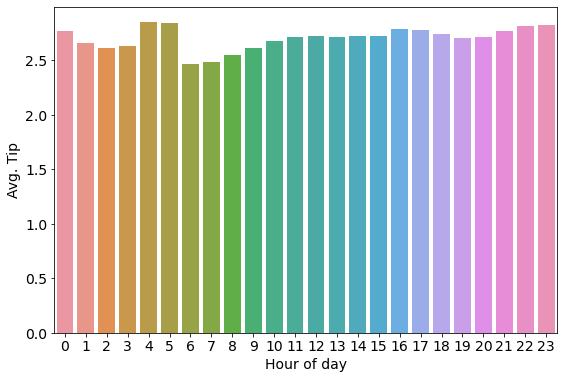

In [ ]:
# average tip by hour
plt.figure(figsize=(9, 6))
ave_tip = data.groupby("starting_hour").sum()['tip_amount']/data.groupby("starting_hour").count()["tpep_pickup_datetime"]
#plt.title('Average tip by hour')
sns.barplot(ave_tip.index, ave_tip)
plt.xlabel("Hour of day")
plt.ylabel("Avg. Tip")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

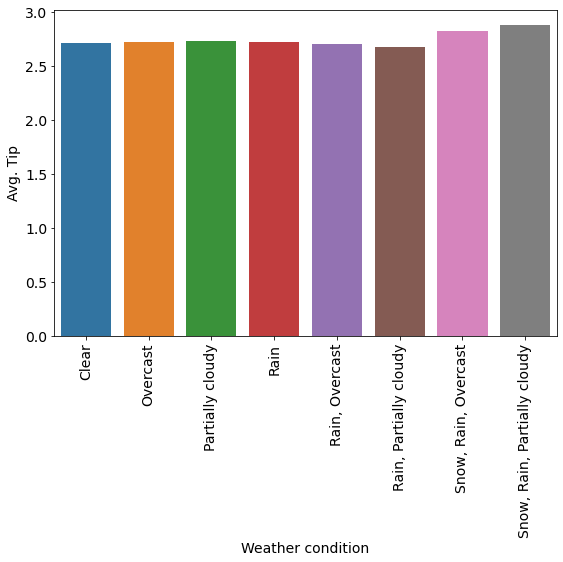

In [ ]:
# average tip by weather
plt.figure(figsize=(9, 6))
weather_tip = data.groupby("conditions").sum()['tip_amount']/data.groupby("conditions").count()["tpep_pickup_datetime"]
sns.barplot(weather_tip.index, weather_tip)
plt.xlabel("Weather condition")
plt.ylabel("Avg. Tip")
plt.xticks(rotation=90)

### Location analysis

In [ ]:
!pip3 install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 12.8 MB/s 
     |████████████████████████████████| 16.6 MB 81.7 MB/s 
     |████████████████████████████████| 7.8 MB 61.7 MB/s 


In [17]:
!wget https://raw.githubusercontent.com/toddwschneider/nyc-citibike-data/master/taxi_zones/taxi_zones.shp

--2022-12-28 10:04:20--  https://raw.githubusercontent.com/toddwschneider/nyc-citibike-data/master/taxi_zones/taxi_zones.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1586264 (1.5M) [application/octet-stream]
Saving to: ‘taxi_zones.shp’

taxi_zones.shp      100%[===================>]   1.51M   285KB/s    in 4.6s    

2022-12-28 10:04:26 (337 KB/s) - ‘taxi_zones.shp’ saved [1586264/1586264]



In [18]:
!wget https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv

--2022-12-28 10:04:46--  https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 143.204.101.63, 143.204.101.58, 143.204.101.20, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|143.204.101.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12322 (12K) [text/csv]
Saving to: ‘taxi+_zone_lookup.csv’

taxi+_zone_lookup.c 100%[===================>]  12.03K  --.-KB/s    in 0.02s   

2022-12-28 10:04:50 (730 KB/s) - ‘taxi+_zone_lookup.csv’ saved [12322/12322]



In [23]:
import geopandas as gpd

# sf stands for shape file
sf = gpd.read_file("taxi_zones.shp")
zone = pd.read_csv("taxi+_zone_lookup.csv")

# Convert the geometry shaape to to latitude and longitude
sf['geometry'] = sf['geometry'].to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

In [24]:
DO_count = data['DOLocationID'].value_counts().sort_index()
DO_count = pd.DataFrame({"LocationID":DO_count.index, "DO_Count":DO_count})
gdf = gpd.GeoDataFrame(pd.merge(DO_count, sf, left_on='LocationID', right_on='LocationID')).drop('LocationID', axis=1)
gdf.sort_values("DO_Count",ascending=False)

,DO_Count,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
221,451581,236,0.044252,0.000103,Upper East Side North,Manhattan,"POLYGON ((-73.95779 40.77360, -73.95826 40.772..."
222,419546,237,0.042213,0.000096,Upper East Side South,Manhattan,"POLYGON ((-73.96613 40.76218, -73.96658 40.761..."
152,315921,161,0.035804,0.000072,Midtown Center,Manhattan,"POLYGON ((-73.97534 40.75530, -73.97581 40.754..."
224,276808,239,0.063626,0.000205,Upper West Side South,Manhattan,"POLYGON ((-73.97501 40.78769, -73.97217 40.786..."
161,276267,170,0.045769,0.000074,Murray Hill,Manhattan,"POLYGON ((-73.97203 40.74580, -73.97213 40.745..."
...,...,...,...,...,...,...,...
147,2,156,0.144477,0.001052,Mariners Harbor,Staten Island,"MULTIPOLYGON (((-74.17990 40.64527, -74.17988 ..."
163,2,172,0.118476,0.000658,New Dorp/Midland Beach,Staten Island,"POLYGON ((-74.08655 40.56963, -74.08691 40.568..."
101,2,109,0.178268,0.001170,Great Kills,Staten Island,"POLYGON ((-74.14706 40.57051, -74.14699 40.570..."
230,1,245,0.095983,0.000466,West Brighton,Staten Island,"POLYGON ((-74.09788 40.64036, -74.09767 40.638..."


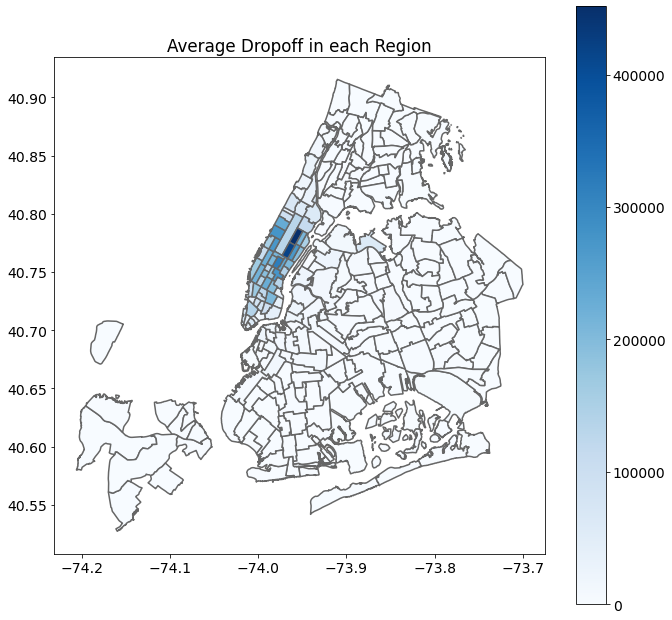

In [25]:
# plot the map showing drop off locations
variable = 'DO_Count'
vmin, vmax = 0, gdf['DO_Count'].max()
fig, ax = plt.subplots(1, figsize=(11,11))
ax.set_title('Average Dropoff in each Region')
sn = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sn.set_array([])
fig.colorbar(sn)
gdf.plot(column=variable, cmap='Blues', linewidth=1.5, ax=ax, edgecolor='0.4')
plt.savefig('Average Dropoff in each Region.png')
plt.show()

In [26]:
fare_region = data.groupby('PULocationID')['fare_amount'].sum()/data['PULocationID'].value_counts().sort_index()
fare_region = pd.DataFrame({"LocationID":fare_region.index, "fare_region":fare_region})
gdf = gpd.GeoDataFrame(pd.merge(fare_region, sf, left_on='LocationID', right_on='LocationID')).drop('LocationID', axis=1)
top_10 = gdf.sort_values("fare_region",ascending=False)[:10]
top_10

,fare_region,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
106,38.000000,118,0.243966,0.001827,Heartland Village/Todt Hill,Staten Island,"POLYGON ((-74.10834 40.61023, -74.10779 40.610..."
173,35.000000,187,0.126868,0.000421,Port Richmond,Staten Island,"MULTIPOLYGON (((-74.13435 40.64189, -74.13430 ..."
54,32.600000,59,0.037795,0.000063,Crotona Park,Bronx,"POLYGON ((-73.88942 40.83942, -73.88869 40.839..."
170,32.400000,184,0.260816,0.001989,Pelham Bay Park,Bronx,"MULTIPOLYGON (((-73.80729 40.88593, -73.80693 ..."
59,31.443529,64,0.184452,0.001058,Douglaston,Queens,"POLYGON ((-73.74412 40.77864, -73.74154 40.777..."
169,31.381250,183,0.039826,0.000095,Pelham Bay,Bronx,"POLYGON ((-73.83677 40.84339, -73.83689 40.843..."
90,31.166000,96,0.185180,0.000548,Forest Park/Highland Park,Queens,"POLYGON ((-73.83804 40.70832, -73.83773 40.708..."
39,30.000000,44,0.235689,0.001945,Charleston/Tottenville,Staten Island,"POLYGON ((-74.21220 40.55644, -74.21350 40.555..."
187,29.800000,201,0.130404,0.000619,Rockaway Park,Queens,"POLYGON ((-73.81850 40.58736, -73.81830 40.587..."
105,29.654167,117,0.169886,0.000904,Hammels/Arverne,Queens,"POLYGON ((-73.77636 40.60966, -73.77627 40.609..."


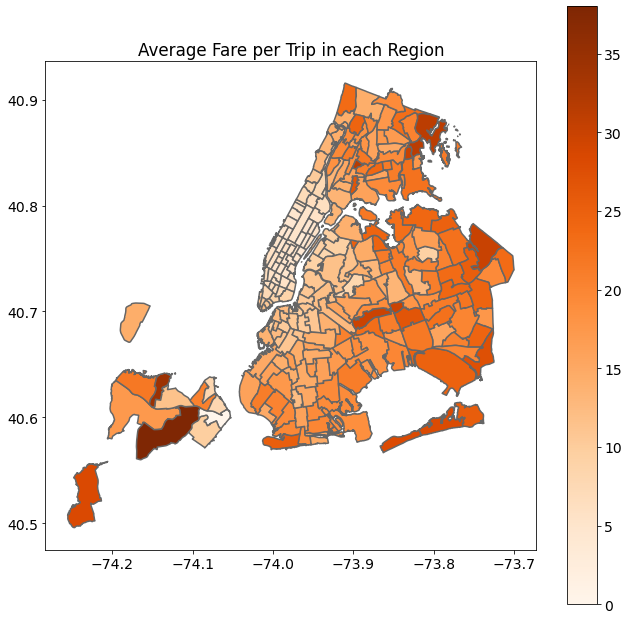

In [27]:
# plot the map showing ave tip in each region
variable = 'fare_region'
vmin, vmax = 0, gdf['fare_region'].max()
fig, ax = plt.subplots(1, figsize=(11,11))
ax.set_title('Average Fare per Trip in each Region')
sn = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sn.set_array([])
fig.colorbar(sn)
gdf.plot(column=variable, cmap='Oranges', linewidth=1.5, ax=ax, edgecolor='0.4')
plt.savefig('Average Fare per Trip in each Region.png')
plt.show()

In [28]:
tip_region = data.groupby('PULocationID')['tip_amount'].sum()/data['PULocationID'].value_counts().sort_index()
tip_region = pd.DataFrame({"LocationID":tip_region.index, "tip_region":tip_region})
gdf = gpd.GeoDataFrame(pd.merge(tip_region, sf, left_on='LocationID', right_on='LocationID')).drop('LocationID', axis=1)
top_10 = gdf.sort_values("tip_region",ascending=False)[:10]
top_10

,tip_region,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
185,6.405000,199,0.077809,0.000289,Rikers Island,Bronx,"POLYGON ((-73.88885 40.79871, -73.88860 40.798..."
65,5.791275,70,0.063840,0.000195,East Elmhurst,Queens,"POLYGON ((-73.85912 40.76128, -73.85897 40.761..."
126,5.735689,138,0.107467,0.000537,LaGuardia Airport,Queens,"MULTIPOLYGON (((-73.87125 40.78604, -73.86978 ..."
162,4.723333,175,0.134898,0.000505,Oakland Gardens,Queens,"POLYGON ((-73.75626 40.75843, -73.75584 40.757..."
120,4.678959,132,0.245479,0.002038,JFK Airport,Queens,"MULTIPOLYGON (((-73.82503 40.66358, -73.82486 ..."
191,4.618571,207,0.028376,0.000045,Saint Michaels Cemetery/Woodside,Queens,"POLYGON ((-73.90138 40.75964, -73.90147 40.759..."
87,4.517385,93,0.170998,0.000594,Flushing Meadows-Corona Park,Queens,"POLYGON ((-73.85696 40.76407, -73.85667 40.763..."
236,4.353125,253,0.036051,0.000078,Willets Point,Queens,"POLYGON ((-73.83908 40.76526, -73.83790 40.764..."
48,4.087083,53,0.161501,0.000948,College Point,Queens,"MULTIPOLYGON (((-73.83839 40.79830, -73.83919 ..."
180,4.085656,194,0.081794,0.000273,Randalls Island,Manhattan,"POLYGON ((-73.91640 40.79768, -73.91545 40.797..."


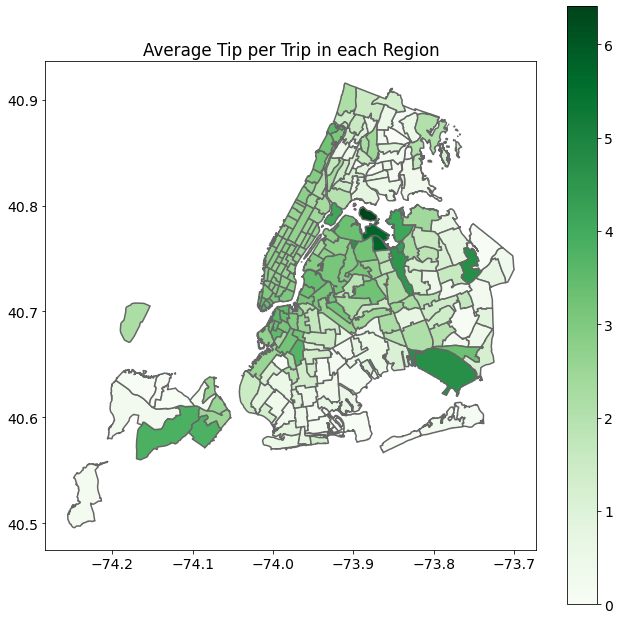

In [29]:
# plot the map showing ave tip in each region
variable = 'tip_region'
vmin, vmax = 0, gdf['tip_region'].max()
fig, ax = plt.subplots(1, figsize=(11,11))
ax.set_title('Average Tip per Trip in each Region')
sn = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sn.set_array([])
fig.colorbar(sn)
gdf.plot(column=variable, cmap='Greens', linewidth=1.5, ax=ax, edgecolor='0.4')
plt.savefig('Average Tip per Trip in each Region.png')
plt.show()

## Model design

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt

In [31]:
target = data['tip_amount']

In [32]:
features = data.drop(['datetime','date','tip_amount','total_amount','tpep_pickup_datetime','tpep_dropoff_datetime','VendorID','PULocationID','DOLocationID','RatecodeID','store_and_fwd_flag','conditions','payment_type'],axis=1)

In [33]:
coding_conditions = pd.get_dummies(data.conditions, prefix='Condition')
coding_conditions.head(10)

,Condition_Clear,Condition_Overcast,Condition_Partially cloudy,Condition_Rain,"Condition_Rain, Overcast","Condition_Rain, Partially cloudy","Condition_Snow, Rain, Overcast","Condition_Snow, Rain, Partially cloudy"
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0


In [34]:
coding_put = pd.get_dummies(data.PULocationID, prefix='PUT')
coding_drop = pd.get_dummies(data.DOLocationID, prefix='DROP')

In [35]:
features =  pd.merge(features, coding_put, left_index=True, right_index=True)
features =  pd.merge(features, coding_drop, left_index=True, right_index=True)
features =  pd.merge(features, coding_conditions, left_index=True, right_index=True)
features.head(10)

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,month,...,DROP_264,DROP_265,Condition_Clear,Condition_Overcast,Condition_Partially cloudy,Condition_Rain,"Condition_Rain, Overcast","Condition_Rain, Partially cloudy","Condition_Snow, Rain, Overcast","Condition_Snow, Rain, Partially cloudy"
0,2.0,4.90,16.0,0.5,0.5,0.0,0.3,2.5,0.0,9,...,0,0,0,1,0,0,0,0,0,0
1,1.0,1.13,6.0,0.5,0.5,0.0,0.3,2.5,0.0,9,...,0,0,0,1,0,0,0,0,0,0
2,2.0,1.37,6.0,0.5,0.5,0.0,0.3,2.5,0.0,9,...,0,0,0,1,0,0,0,0,0,0
3,1.0,0.90,6.0,2.5,0.5,0.0,0.3,2.5,0.0,9,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1.00,5.5,2.5,0.5,0.0,0.3,2.5,0.0,9,...,0,0,0,1,0,0,0,0,0,0
5,1.0,0.90,5.0,2.5,0.5,0.0,0.3,2.5,0.0,9,...,0,0,0,1,0,0,0,0,0,0
6,1.0,1.00,5.5,2.5,0.5,0.0,0.3,2.5,0.0,9,...,0,0,0,1,0,0,0,0,0,0
7,1.0,0.90,5.0,2.5,0.5,0.0,0.3,2.5,0.0,9,...,0,0,0,1,0,0,0,0,0,0
8,1.0,1.94,8.5,0.0,0.5,0.0,0.3,2.5,0.0,9,...,0,0,0,1,0,0,0,0,0,0
9,1.0,1.23,6.5,0.0,0.5,0.0,0.3,2.5,0.0,9,...,0,0,0,1,0,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,target,random_state=0,test_size=0.3)

In [37]:
from sklearn import preprocessing
# Unnecessary
#nmt = preprocessing.MinMaxScaler()
#nmt.fit(X_train)
#X_train = nmt.transform(X_train)
#X_test = nmt.transform(X_test)

In [38]:
X_train

array([[0.        , 0.00361593, 0.17808219, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00918953, 0.30136986, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00449112, 0.16438356, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00274074, 0.17808219, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00398443, 0.16438356, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00110551, 0.04109589, ..., 0.        , 0.        ,
        0.        ]])

In [40]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
print('Score on train set for LR:',regressor.score(X_train,y_train))
print('Score on test set for LR:',regressor.score(X_test,y_test))

Score on train set for LR: 0.48475266857642274
Score on test set for LR: 0.4842562601952255


In [45]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
   regressor.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs_sorted = coefs.sort_values(by=['Coefficients'])

In [47]:
last10_coefs = coefs_sorted.iloc[:20,]
last10_coefs

,Coefficients
PUT_187,-5.907215
PUT_221,-4.689649
PUT_59,-4.220226
PUT_156,-3.721824
PUT_183,-3.463327
PUT_147,-3.388071
PUT_64,-3.310417
PUT_117,-3.192855
DROP_248,-3.152176
PUT_139,-3.148933


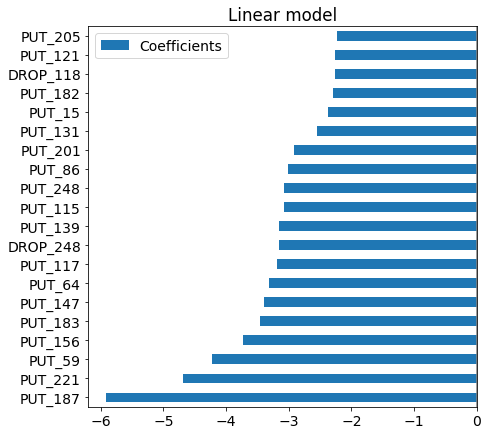

In [48]:
last10_coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Linear model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [49]:
top10_coefs = coefs_sorted.iloc[-20:,]
top10_coefs

,Coefficients
PUT_132,1.475354
PUT_120,1.490207
PUT_105,1.500422
PUT_33,1.514654
PUT_264,1.522740
PUT_175,1.524558
PUT_54,1.527353
PUT_112,1.547590
PUT_93,1.613706
PUT_214,1.624028


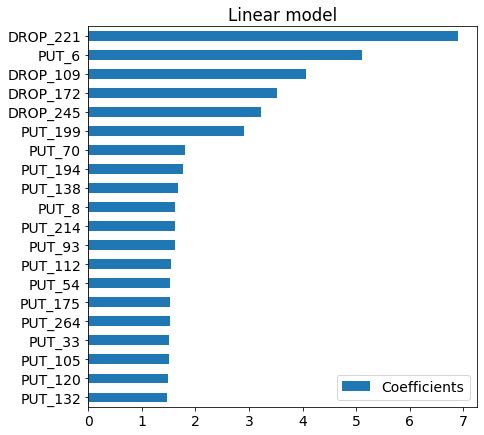

In [50]:
top10_coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Linear model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [51]:
y_pred = regressor.predict(X_test)

In [58]:
y_test = list(y_test)

In [59]:
errors_1 = [abs(y_pred[i]-y_test[i]) for i in range(len(y_pred))]

Text(0, 0.5, 'Number')

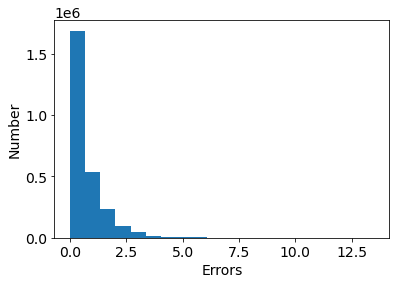

In [62]:
plt.hist(errors_1,bins=20)
plt.xlabel('Errors')
plt.ylabel('Number')

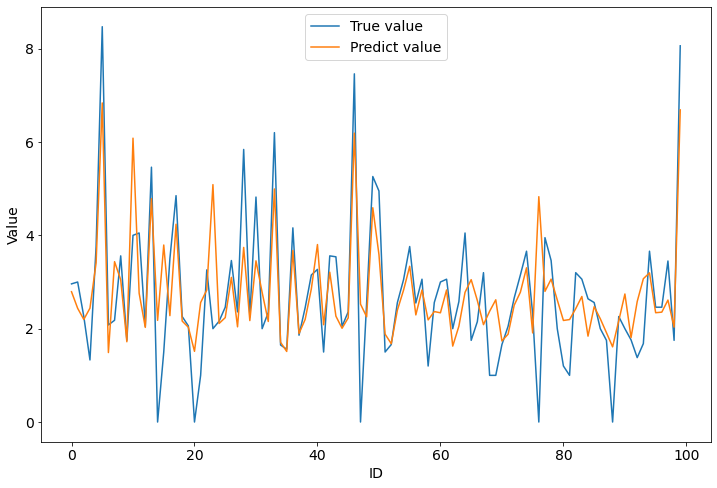

In [ ]:
plt.figure(figsize=(12,8))
plt.plot([x for x in range(0,100)],y_test[100:200],label="True value")
plt.plot([x for x in range(0,100)],y_pred[100:200],label="Predict value")
plt.xlabel("ID")
plt.ylabel("Value")
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
mse_loss = mean_squared_error(y_test , y_pred)

print('Mean_sqaure error loss  =  ' , mse_loss)

Mean_sqaure error loss  =   1.17606716917784


In [ ]:
from sklearn.linear_model import Ridge
ridge_clf = Ridge(alpha=0.5)
ridge_clf.fit(X_train, y_train)


Ridge(alpha=0.6)

In [ ]:
print('Score on train set for Ridge:',ridge_clf.score(X_train,y_train))
print('Score on test set for Ridge:',ridge_clf.score(X_test,y_test))

Score on train set for Ridge: 0.47366441801069215
Score on test set for Ridge: 0.47339156170019336


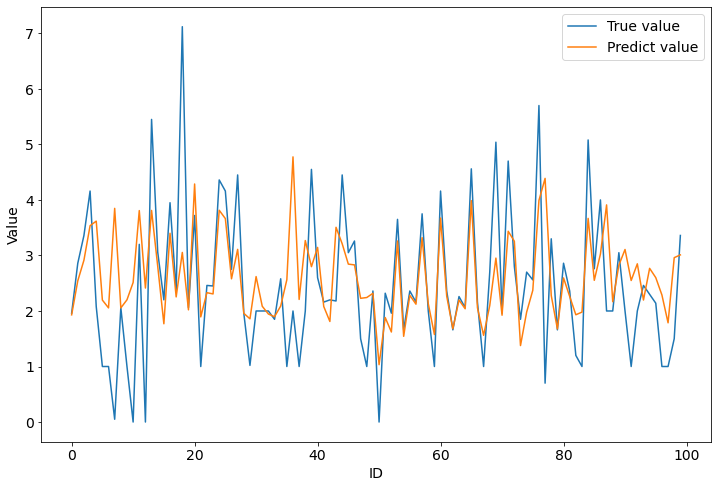

In [ ]:
y_pred_1 = ridge_clf.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot([x for x in range(0,100)],y_test[:100],label="True value")
plt.plot([x for x in range(0,100)],y_pred_1[:100],label="Predict value")
plt.xlabel("ID")
plt.ylabel("Value")
plt.legend()

In [ ]:
from sklearn.linear_model import Lasso
lasso_clf = Lasso(alpha=0.5)
lasso_clf.fit(X_train, y_train)

Lasso(alpha=0.6)

In [ ]:
print('Score on train set for Lasso:',lasso_clf.score(X_train,y_train))
print('Score on test set for Lasso:',lasso_clf.score(X_test,y_test))

Score on train set for Lasso: 0.4576358314580242
Score on test set for Lasso: 0.45737324241908484


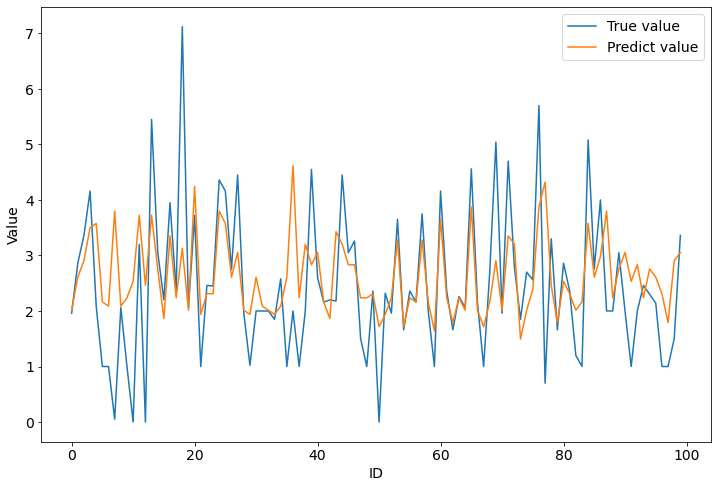

In [ ]:
y_pred_2 = lasso_clf.predict(X_test)
plt.figure(figsize=(12,8))
plt.plot([x for x in range(0,100)],y_test[:100],label="True value")
plt.plot([x for x in range(0,100)],y_pred_2[:100],label="Predict value")
plt.xlabel("ID")
plt.ylabel("Value")
plt.legend()

In [ ]:
from xgboost import XGBRegressor
import sklearn

xg_model = XGBRegressor(n_estimators=30)
xg_model.fit(X_train, y_train)
predicted_XGBoost = xg_model.predict(X_test)
print("Mean Absolute Error using XGBoost: ", sklearn.metrics.mean_squared_error(y_test, predicted_XGBoost))

[03:05:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:05:54] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [ ]:
print('Score on train set for XGBoost:',xg_model.score(X_train,y_train))
print('Score on test set for XGBoost:',xg_model.score(X_test,y_test))

In [ ]:
y_pred = xg_model.predict(X_test)

In [ ]:
list = [x for x in range(0,100)]
plt.figure(figsize=(12,8))
plt.plot(list,y_test[:100],y_pred[:100])
plt.xlabel("ID")
plt.ylabel("Value")

In [ ]:
from sklearn.decomposition import PCA
# Test the components of 50 and compare the result
pca = PCA(n_components=50)
pca.fit(X_train)


In [ ]:
X_train_n = pca.transform(X_train)
X_test_n = pca.transform(X_test)

In [ ]:
ridge_clf = Ridge(alpha=0.5)
ridge_clf.fit(X_train_n, y_train)

In [ ]:
print('Score on train set for Ridge:',ridge_clf.score(X_train_n,y_train))
print('Score on test set for Ridge:',ridge_clf.score(X_test_n,y_test))

In [ ]:
train_scores = []
test_scores = []
for n in range(5,106,15):
    print("Now processing n:",n)
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train_n = pca.transform(X_train)
    X_test_n = pca.transform(X_test)
    ridge_clf = Ridge(alpha=0.5)
    ridge_clf.fit(X_train_n, y_train)
    train_scores.append(ridge_clf.score(X_train_n,y_train))
    test_scores.append(ridge_clf.score(X_test_n,y_test))

In [ ]:
plt.plot([n for n in range(5,106,15)],train_scores,label='Train set')
plt.plot([n for n in range(5,106,15)],test_scores,label='Test set')
plt.legend()
plt.xlabel('n')
plt.ylabel('Score')


In [ ]:
train_scores = []
test_scores = []
for n in range(5,106,15):
    print("Now processing n:",n)
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train_n = pca.transform(X_train)
    X_test_n = pca.transform(X_test)
    xg_model.fit(X_train_n, y_train)
    train_scores.append(xg_model.score(X_train_n,y_train))
    test_scores.append(xg_model.score(X_test_n,y_test))

In [ ]:
plt.plot([n for n in range(5,106,15)],train_scores,label='Train set')
plt.plot([n for n in range(5,106,15)],test_scores,label='Test set')
plt.legend()
plt.xlabel('n')
plt.ylabel('Score')
